In [1]:
import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 16s 1us/step


In [3]:
x_test.shape

(10000, 28, 28)

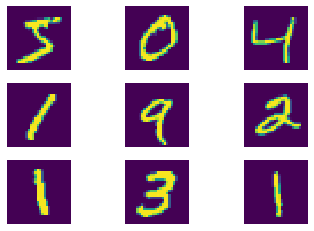

In [4]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])
    plt.axis('off')

In [5]:
x_train.shape
x_train=x_train[...,np.newaxis]
x_test=x_test[...,np.newaxis]

In [6]:
x_train.shape

(60000, 28, 28, 1)

In [7]:
x_train_norm=x_train.astype('int8')
x_test_norm=x_test.astype('int8')
x_train_norm=x_train_norm/255.0
x_test_norm=x_test_norm/255.0
x_train_norm.shape,x_test_norm.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [8]:
y_train=y_train.astype('int8')
y_test=y_test.astype('int8')

In [9]:
input_shape=x_train.shape[1],x_train.shape[2],1
input_shape

(28, 28, 1)

In [10]:

model=tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3),2,activation='relu',input_shape=input_shape))
model.add(tf.keras.layers.MaxPooling2D((3,3),2,padding='same'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(32,(3,3),2,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((3,3),2,padding='same'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(32,activation='relu'))


model.add(tf.keras.layers.Dense(10,activation='softmax'))




In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 13, 13, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 32)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 7, 7, 32)          128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 2, 2, 32)          128       
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

In [12]:
optimiser=tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimiser,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
history = model.fit(x_train, y_train,batch_size=32, epochs=30)


Epoch 1/30
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1979 - accuracy: 0.9400
Epoch 2/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0702 - accuracy: 0.9783
Epoch 3/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0547 - accuracy: 0.9830
Epoch 4/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0438 - accuracy: 0.9860
Epoch 5/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0369 - accuracy: 0.9877
Epoch 6/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0323 - accuracy: 0.9896
Epoch 7/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0304 - accuracy: 0.9896
Epoch 8/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0274 - accuracy: 0.9906
Epoch 9/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0241 - accuracy: 0.9918
Epoch 10/30
1875/1875 [==============================] - 13s 7ms/step - l

In [14]:
   # evaluate model on test set
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0896 - accuracy: 0.9815

Test accuracy: 0.9815000295639038


In [15]:
def predict(x):
    x_train[x].shape
    some_data=x_train[x]
    some_data=some_data[np.newaxis,...]
    prediction=model.predict(some_data)
    predictr=np.argmax(prediction,axis=1)
    return predictr,y_train[x]    

In [16]:
predict(144)

(array([8], dtype=int64), 8)